In [ ]:
                                     Bike Rental - Linear Regression Model Assignment
Business Objective :-
A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. 
The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful 
business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy
state.

Problem Statement :-
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management 
to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet
the demand levels and meet the customer's expectations.
Further, the model will be a good way for management to understand the demand dynamics of a new market.

Goal :- Company want to understand the factors affecting the demand for these shared bikes in the American market. 
The company wants to know:
Which variables are significant in predicting the demand for shared bikes. How well those variables describe the bike demands


In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

In [ ]:
                                      Understanding the Dataset Values and Review

In [3]:
# Read the data from csv file

BR= pd.read_csv("D:Upgrad/LinearRegression/day.csv")

In [4]:
BR.shape

(730, 16)

In [5]:
BR.head

<bound method NDFrame.head of      instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0          1  01-01-2018       1   0     1        0        6           0   
1          2  02-01-2018       1   0     1        0        0           0   
2          3  03-01-2018       1   0     1        0        1           1   
3          4  04-01-2018       1   0     1        0        2           1   
4          5  05-01-2018       1   0     1        0        3           1   
..       ...         ...     ...  ..   ...      ...      ...         ...   
725      726  27-12-2019       1   1    12        0        4           1   
726      727  28-12-2019       1   1    12        0        5           1   
727      728  29-12-2019       1   1    12        0        6           0   
728      729  30-12-2019       1   1    12        0        0           0   
729      730  31-12-2019       1   1    12        0        1           1   

     weathersit       temp     atemp      hum  windspeed 

In [6]:
BR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
#check the columns of data
BR.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [ ]:
                                Dataset Details - " 730 Rows & 16 Columns"

In [8]:
#details of numeric data
BR.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [9]:
# datatypes of data
BR.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [ ]:
                                    Data Cleaning activity 
1. Check Missing Values/Null Values
2. Drop the Column if they are not useful
3. Converting columns to Categorial Variable
4. Univariate Analysis
5. Handling Outliers
6. EDA
7. Correlation Analysis

In [ ]:
1. Indentifying Missing and Null Values

In [10]:
#check the Null value 
round(BR.isnull().sum()/len(BR)*100,2)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [ ]:
2. Dropping columns which are not useful for the analysis

In [11]:
#instant column has only index value. lets drop this.
BR = BR.drop(columns=['instant'])

In [12]:
BR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    int64  
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  casual      730 non-null    int64  
 13  registered  730 non-null    int64  
 14  cnt         730 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 85.7+ KB


In [15]:
 BR = BR.drop(columns=['registered'])

In [17]:
BR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    int64  
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  cnt         730 non-null    int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 74.3+ KB


In [ ]:
3. Converting Column to Categorial Type

In [18]:
#drived column: "date" extract date and rename it to date 
BR['dteday'] =BR['dteday'].apply(lambda x: int(x.split('-')[0]))
BR = BR.rename(columns={"dteday": "date"})

In [19]:
# weathersit variable
BR.weathersit.describe()

count    730.000000
mean       1.394521
std        0.544807
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        3.000000
Name: weathersit, dtype: float64

In [21]:
BR['weathersit'] = BR['weathersit'].map({1: 'clear', 2: 'mist', 3: 'light', 4: 'heavy'})

In [22]:
# season variable
BR.season.describe()

count    730.000000
mean       2.498630
std        1.110184
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        4.000000
Name: season, dtype: float64

In [23]:
BR['season'] = BR['season'].map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})

In [25]:
#converting weekday column
BR['weekday']=BR['weekday'].map({0:'Sunday',1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday'})

In [27]:
# converting month column
BR['mnth']=BR['mnth'].map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})

In [29]:
BR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        730 non-null    int64  
 1   season      730 non-null    object 
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    object 
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    object 
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    object 
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  cnt         730 non-null    int64  
dtypes: float64(4), int64(5), object(4)
memory usage: 74.3+ KB


In [31]:
BR.shape

(730, 13)

BR_numeric_cols=['temp', 'atemp', 'hum', 'windspeed', 'cnt']

In [ ]:
4. EDA analysis

In [33]:
BR_numeric_cols=['temp', 'atemp', 'hum', 'windspeed', 'cnt']

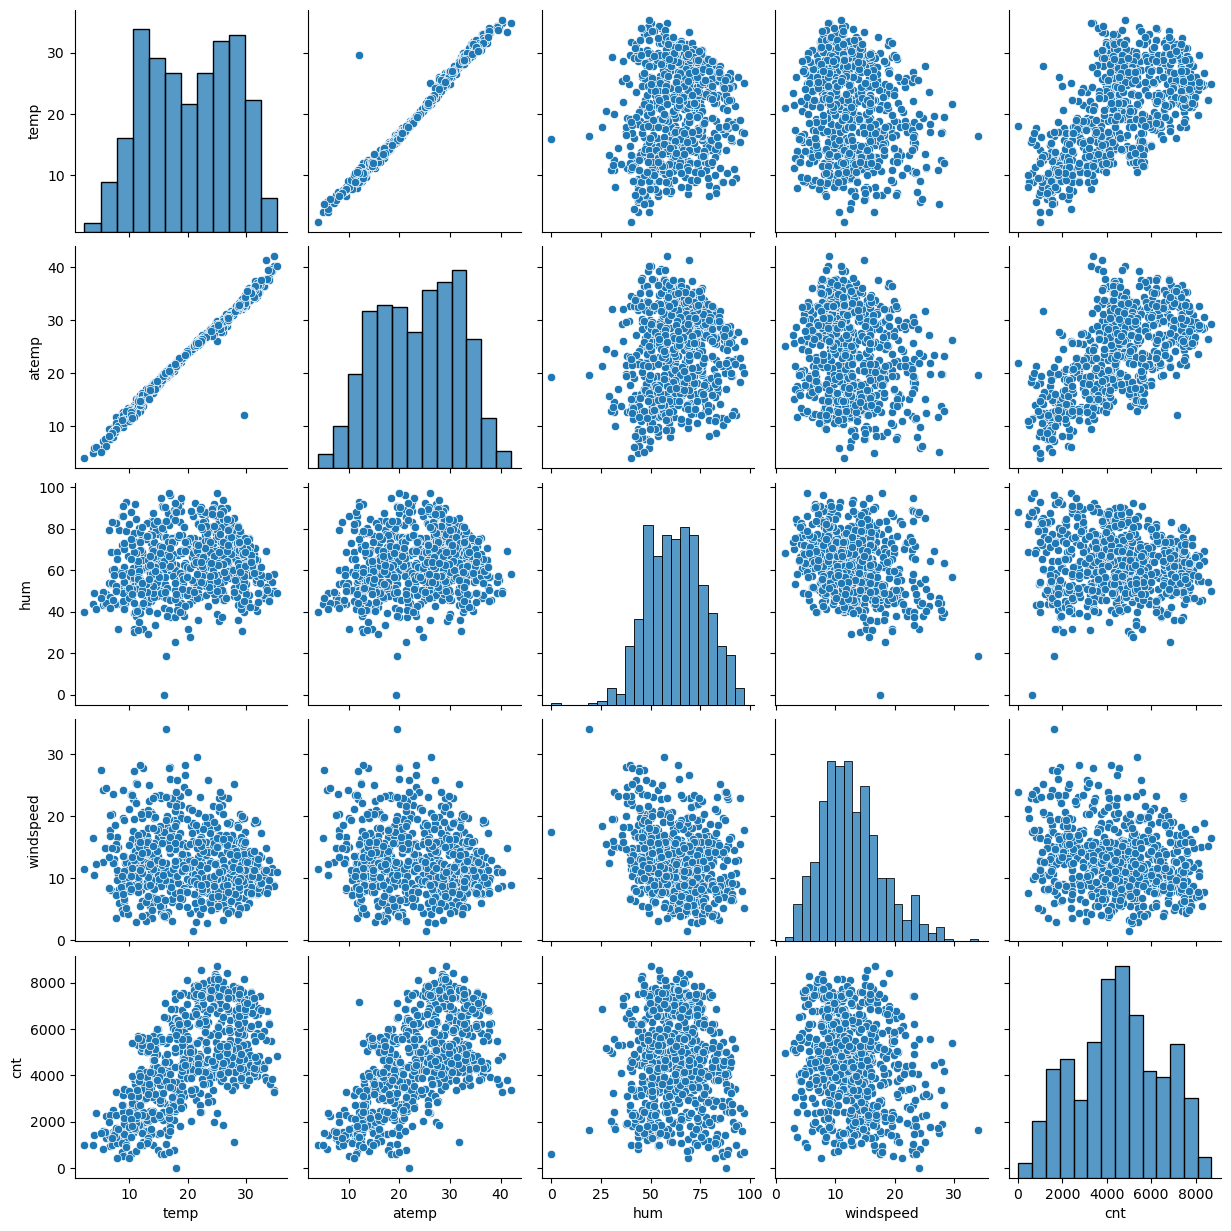

In [35]:
sns.pairplot(BR, vars=BR_numeric_cols)
plt.show()

In [ ]:
Observations

a. temp and atemp variable have correlation with cnt target variable.
b. temp and atemp variable are also highly correlated.

In [ ]:
5. Categorical Column Analyis

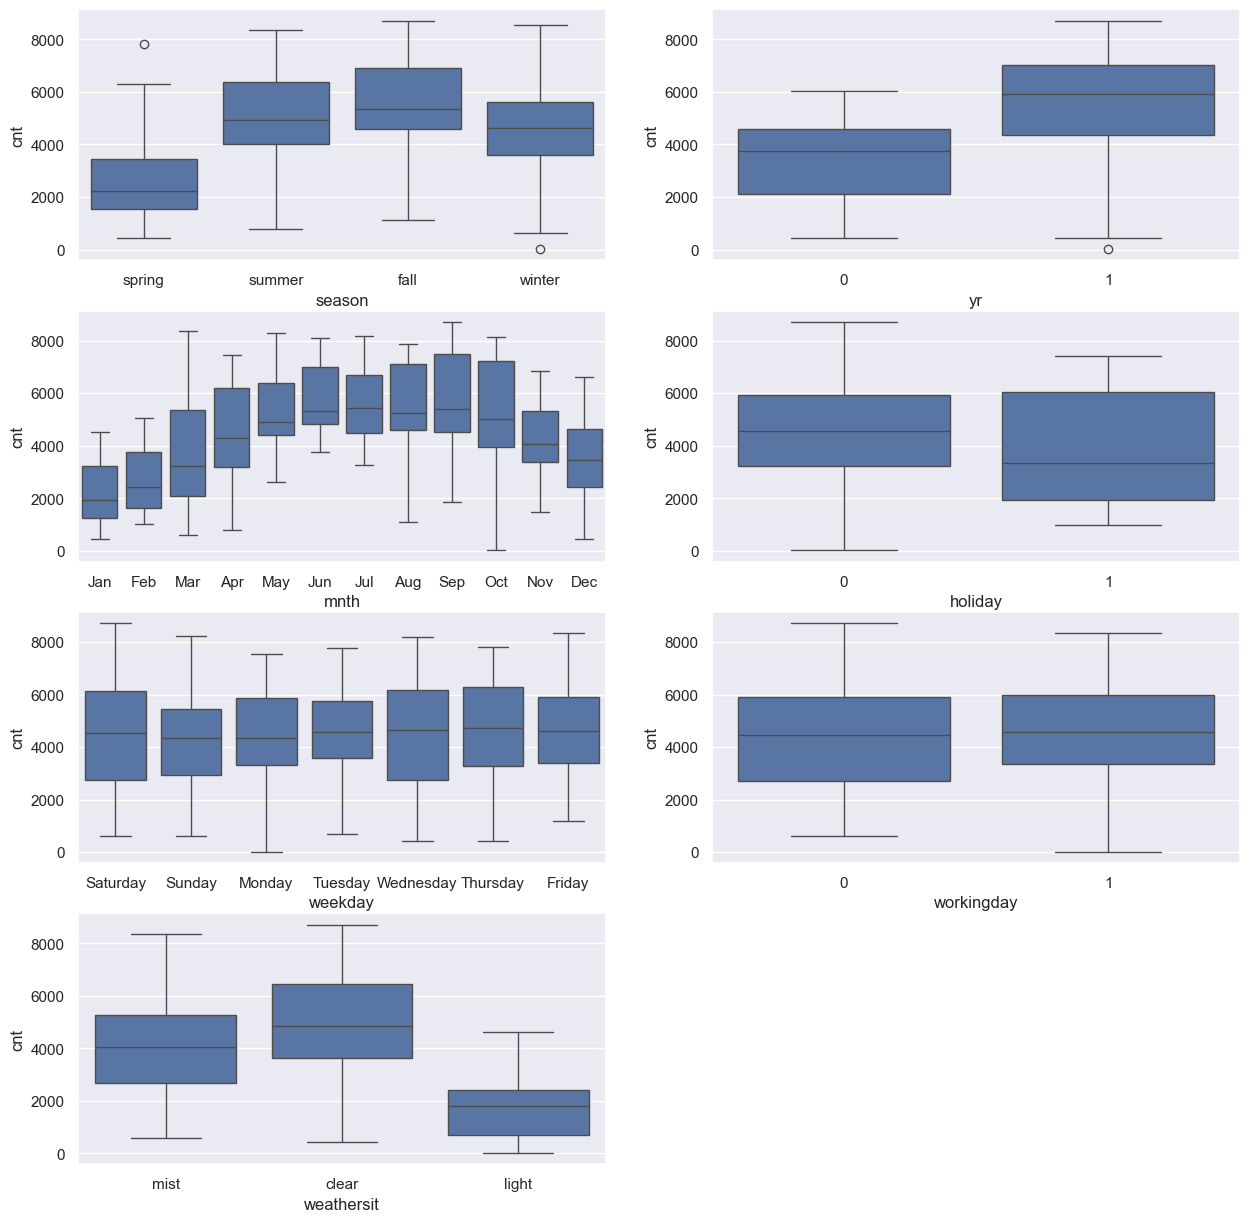

In [37]:
# Boxplot of categorical variables
bike_cat_col = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
plt.figure(figsize=(15, 15))
sns.set_theme(style="darkgrid")
i=1
for rfe_cols in bike_cat_col:
    plt.subplot(4,2,i)
    sns.boxplot(data=BR, x=rfe_cols, y='cnt')
    i=i+1
plt.show()

In [ ]:
Observations:

1. season: Fall season has the highest demand.
2. year: bike demand has increased from 2018 to 2019.
3. month: bike demand increases from Jan to Jul and after that demand start dropping and Dec month has least bike demand.
4. weekday: there is no particular pattern.
5. working day: on workingday, bike demand is little high.
6. weathersit: when weathersit is clear, bike demand is high.
7. Thursday, Friday, Saturday have more bookings when compared to the start of the week.

In [ ]:
6. Correlation Analysis

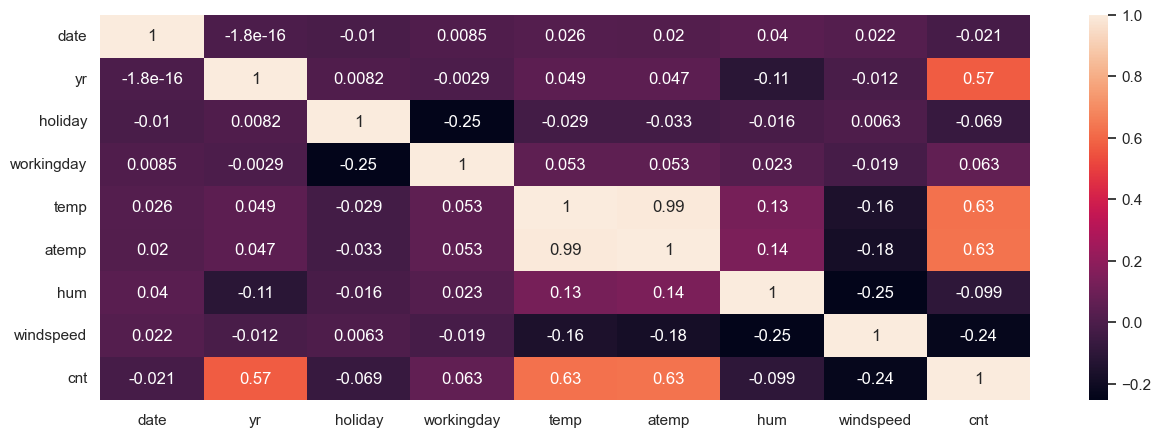

In [38]:
BR.head()
cor=BR.corr(numeric_only=True)
plt.figure(figsize=(15,5))
sns.heatmap(cor, annot = True)
plt.show()

In [ ]:
Observation: temp and atemp has the highest correlation.

In [39]:
BR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        730 non-null    int64  
 1   season      730 non-null    object 
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    object 
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    object 
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    object 
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  cnt         730 non-null    int64  
dtypes: float64(4), int64(5), object(4)
memory usage: 74.3+ KB


In [ ]:
7. Visualizing the Data Analysis

In [40]:
# function to create barplot related to categorical columns

def plot_cat_columns(column):
    plt.figure(figsize = (12,6))
    plt.subplot(1,2,1)
    sns.barplot(x=column, y='cnt',data=BR)
    plt.subplot(1,2,2)
    sns.barplot(x=column,y='cnt',data=BR, hue='yr',palette='Set1')
    plt.legend(labels=['2018', '2019'])
    plt.show()

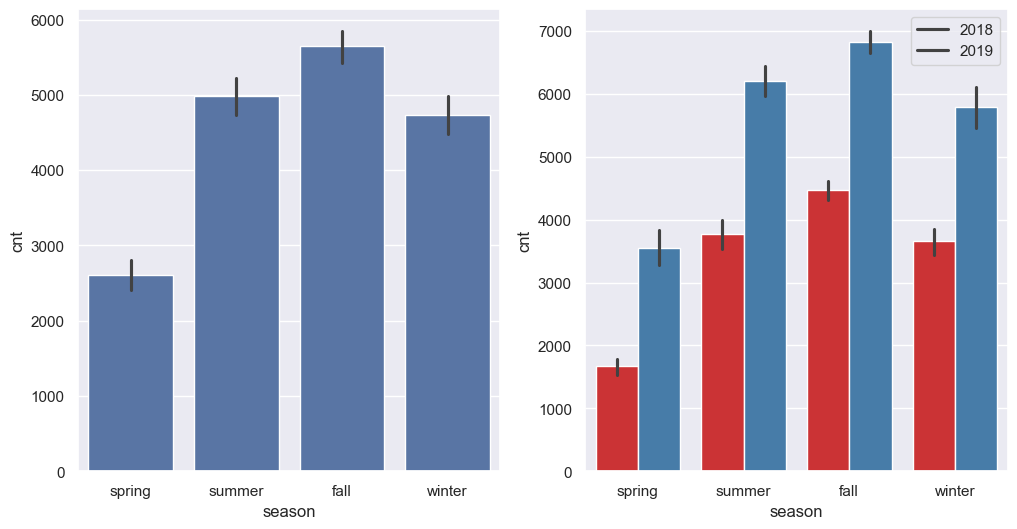

In [41]:
# plotting visualization for season column

plot_cat_columns('season')

In [ ]:
Finding :- Fall season seems to have more bookings, followed by summer and in each season the booking count has increased from 2018 to 2019.

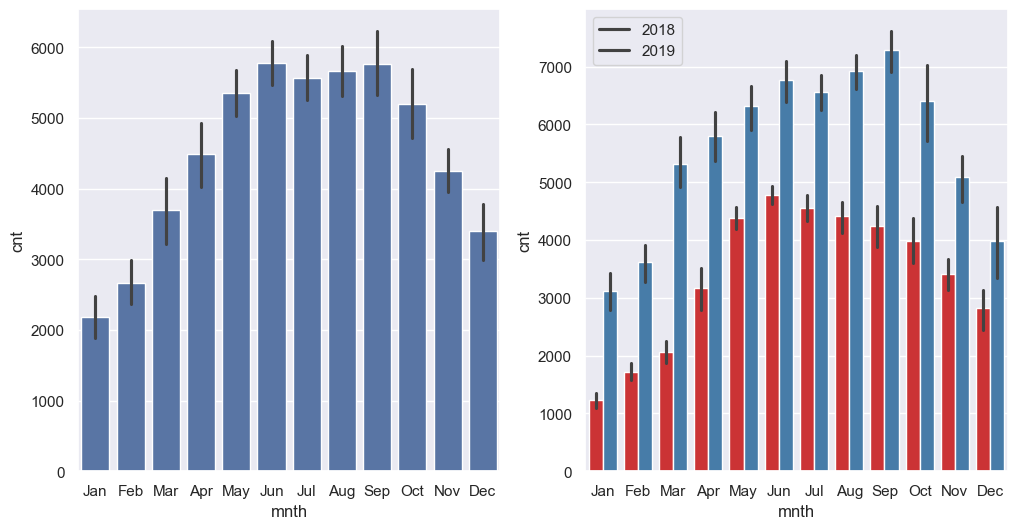

In [42]:
# plotting visualization for month column
plot_cat_columns('mnth')

In [ ]:
Findings from the above plot :- 
Most of the bookings has been done during the month of May, June, July, Aug, Sep and Oct. 
Trend increased starting of the year till mid of the year and then it started decreasing as it approached the end of year.
Number of bookings for each month seems to have increased from 2018 to 2019.

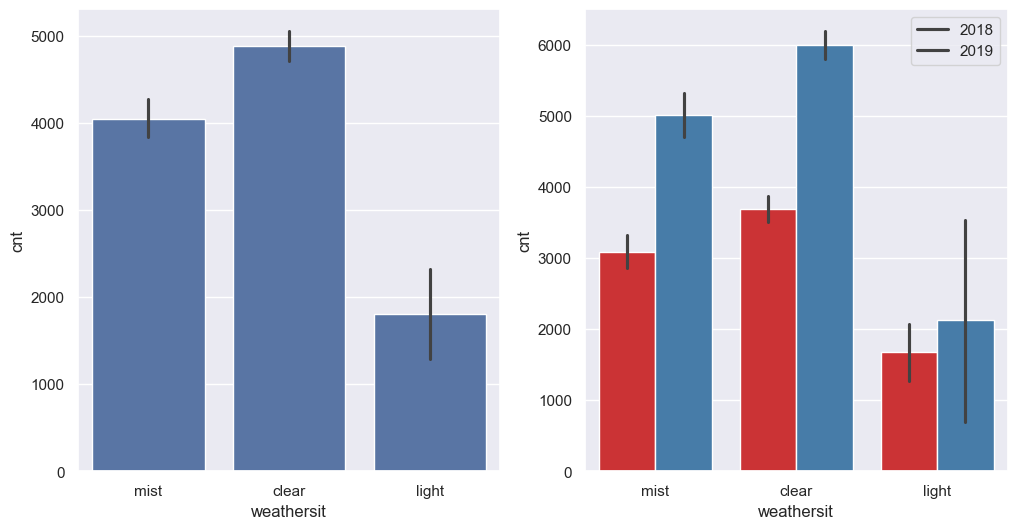

In [43]:
# plotting visualization for weathersit column

plot_cat_columns('weathersit')

In [ ]:
Details from the above plot - Clear weather attracted more booking which seems obvious. 
Comparing 2018 booking increased for each weather situation in 2019.

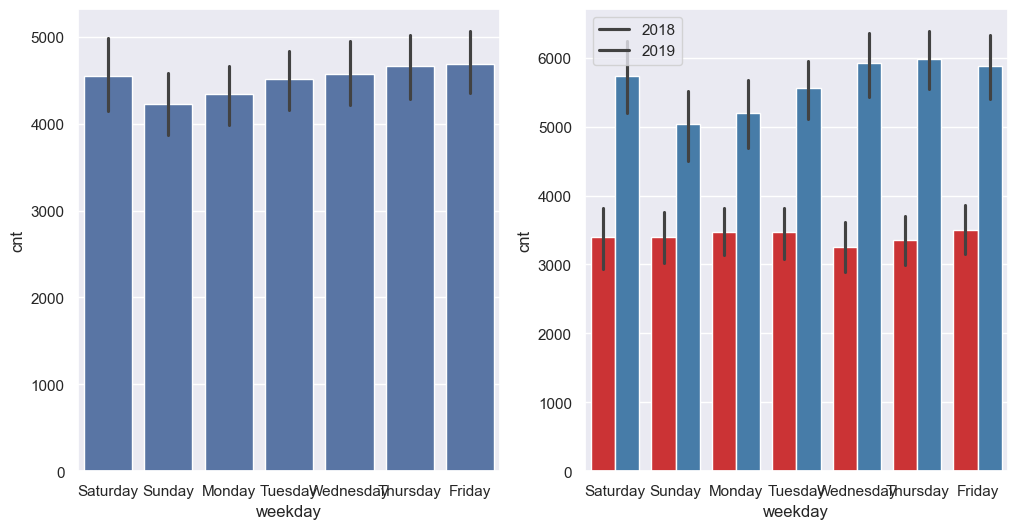

In [44]:
# plotting visualization for weekday column

plot_cat_columns('weekday')

In [ ]:
Finding from the above Plot :- Thu, Fir, Sat and Sun have more number of bookings as compared to the start of the week.

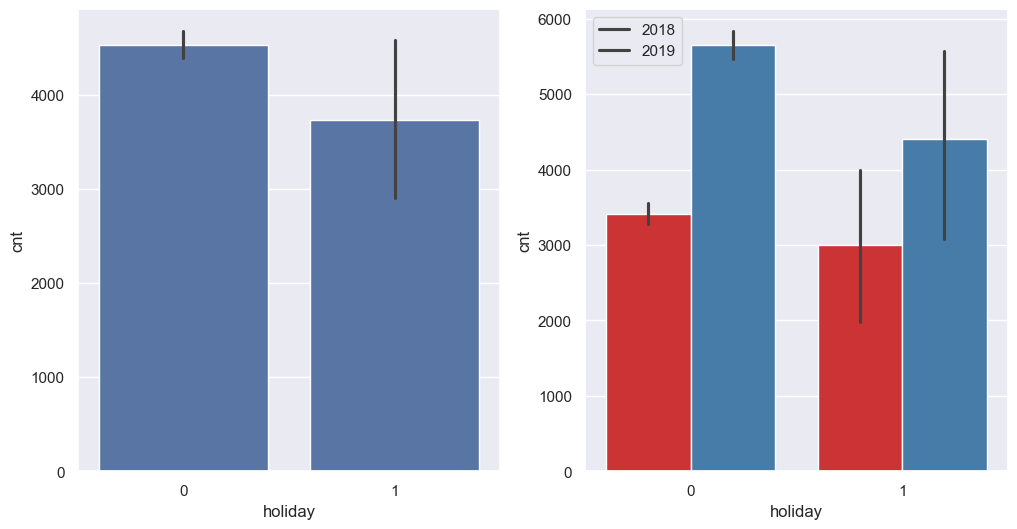

In [45]:
# plotting visualization for holiday column

plot_cat_columns('holiday')

In [ ]:
When its holiday, booking seems to be less in number which makes sense.

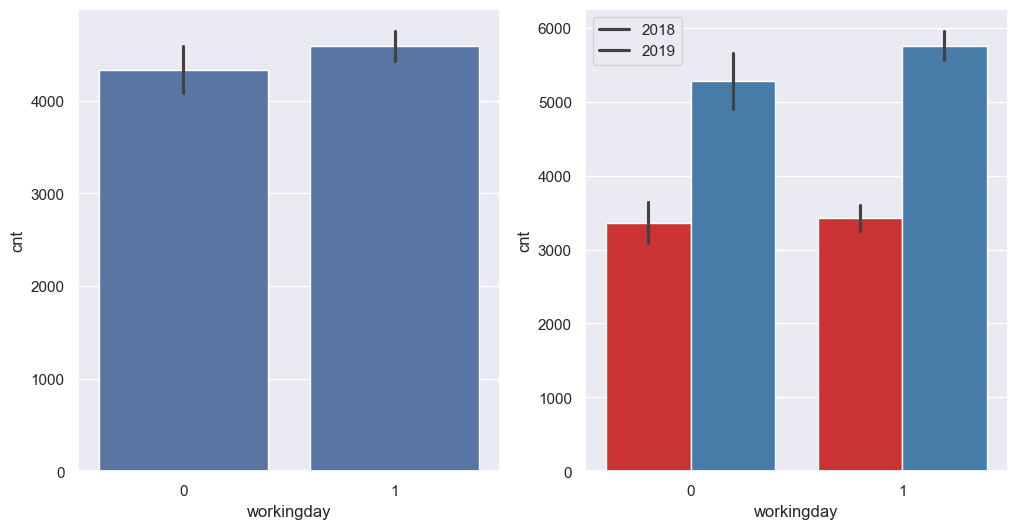

In [46]:
# plotting visualization for workingday column

plot_cat_columns('workingday')

In [ ]:
Booking seemed to be almost equal either on working day or non-working day. But, the count increased from 2018 to 2019.

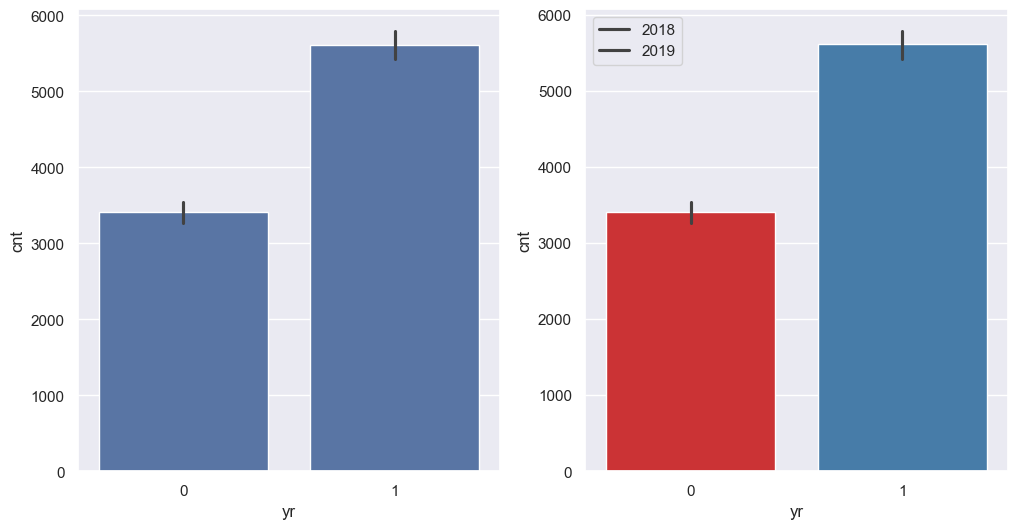

In [47]:
# plotting visualization for year column

plot_cat_columns('yr')

In [ ]:
2019 attracted more number of booking from the previous year, which shows good progress in terms of business.
There is a linear relationship between temp and atemp. Both of the parameters cannot be used in the model due to multicolinearity.
We will decide which parameters to keep based on VIF and p-value w.r.t other variables

In [ ]:
Linear Regression and Data Preparation
Linear Regression data preparation:
a. create dummy variables
b. train and test split
c. variable scaling normalization
d. define target column and feature columns

In [ ]:
Create Dummy Variables :- 

In [48]:
# creating dummy variable for categorical variable:
category_cols = ['mnth', 'season', 'weekday', 'weathersit']
dummy_cols = pd.get_dummies(BR[category_cols], drop_first=True)
dummy_cols.head(10)

,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,...,season_summer,season_winter,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_light,weathersit_mist
0,False,False,False,True,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
1,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
2,False,False,False,True,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
5,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
6,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
7,False,False,False,True,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
8,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
9,False,False,False,True,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [49]:
#  concatenate  it with dataset 
BR_new = pd.concat([BR, dummy_cols], axis=1)
BR_new = BR_new.drop(columns=category_cols)

In [51]:
BR_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               730 non-null    int64  
 1   yr                 730 non-null    int64  
 2   holiday            730 non-null    int64  
 3   workingday         730 non-null    int64  
 4   temp               730 non-null    float64
 5   atemp              730 non-null    float64
 6   hum                730 non-null    float64
 7   windspeed          730 non-null    float64
 8   cnt                730 non-null    int64  
 9   mnth_Aug           730 non-null    bool   
 10  mnth_Dec           730 non-null    bool   
 11  mnth_Feb           730 non-null    bool   
 12  mnth_Jan           730 non-null    bool   
 13  mnth_Jul           730 non-null    bool   
 14  mnth_Jun           730 non-null    bool   
 15  mnth_Mar           730 non-null    bool   
 16  mnth_May           730 non

In [ ]:
b. Train and Test Split 

In [52]:
#Train Test split of dataset in 70:30 ratio
df_train, df_test = train_test_split(BR_new, test_size=0.3, random_state=100)

In [53]:
print("shape of traing data", df_train.shape)
print("shape of test data", df_test.shape)

shape of traing data (511, 31)
shape of test data (219, 31)


In [ ]:
c. Feature Scaling and Normalization

In [54]:
scaler = MinMaxScaler()

In [55]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
numeric_cols = ['temp','atemp','hum','windspeed','cnt']

df_train[numeric_cols] = scaler.fit_transform(df_train[numeric_cols])

In [56]:
#Inspect stats fro Training set after scaling
df_train.describe()

,date,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,15.592955,0.508806,0.025440,0.677104,0.537386,0.513133,0.650333,0.320844,0.514186
std,8.903110,0.500412,0.157613,0.468042,0.225640,0.212202,0.145741,0.169639,0.224737
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,0.000000,0.000000,0.000000,0.341151,0.332910,0.538858,0.199179,0.356765
50%,16.000000,1.000000,0.000000,1.000000,0.542077,0.529300,0.653499,0.298098,0.519673
75%,23.000000,1.000000,0.000000,1.000000,0.735215,0.688457,0.754401,0.414438,0.688737
max,31.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [57]:
df_train.head()

,date,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,mnth_Aug,...,season_summer,season_winter,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_light,weathersit_mist
653,16,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,False,...,False,True,False,False,False,False,True,False,False,False
576,31,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,False,...,False,False,False,False,False,False,True,False,False,False
426,3,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,False,...,False,False,False,True,False,False,False,False,False,True
728,30,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,False,...,False,False,False,False,True,False,False,False,False,False
482,28,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,False,...,True,False,False,True,False,False,False,False,False,True


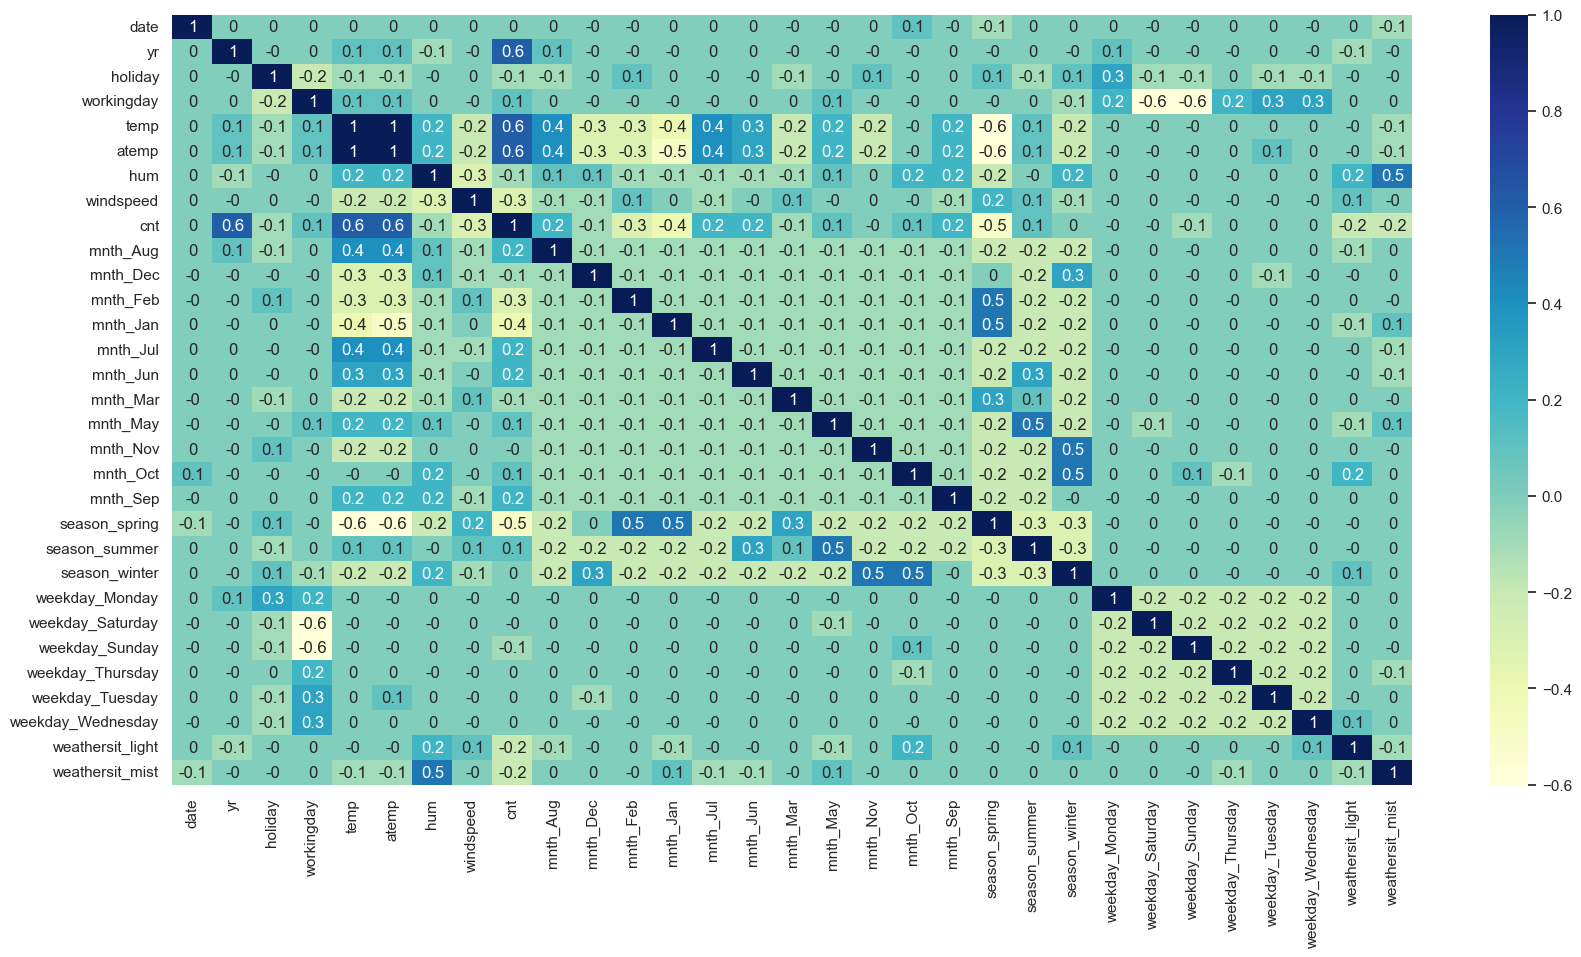

In [58]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (20, 10))
sns.heatmap(round(df_train.corr(), 1), annot=True, cmap="YlGnBu")
plt.show()

In [ ]:
d. Define Target and Feature Column

In [59]:
y_train = df_train.pop('cnt')
X_train = df_train

In [ ]:
Interative Model Process

In [ ]:
Building  linear regression model for RFE using sklearn

In [60]:
# a Linear Regression model for RFE
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [61]:
#Selecting 15 features using automated approach
rfe = RFE(lr, n_features_to_select=15)
rfe=rfe.fit(X_train, y_train)

In [62]:
rfe_df = pd.DataFrame({'feature': X_train.columns, 'Select Status': rfe.support_, 'Ranking': rfe.ranking_})
rfe_df.sort_values(by='Ranking')

,feature,Select Status,Ranking
29,weathersit_mist,True,1
20,season_summer,True,1
19,season_spring,True,1
18,mnth_Sep,True,1
23,weekday_Saturday,True,1
28,weathersit_light,True,1
12,mnth_Jul,True,1
21,season_winter,True,1
11,mnth_Jan,True,1
7,windspeed,True,1


In [ ]:
Finding of the above output:- RFE method has selected top 15 features.
we will start building model with these features but will also use manual buildings method to find the best performing model.

In [63]:
# selecting the selected variable via RFE in col list
rfe_supp_cols = X_train.columns[rfe.support_]
print(rfe_supp_cols)

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'mnth_Jan',
       'mnth_Jul', 'mnth_Sep', 'season_spring', 'season_summer',
       'season_winter', 'weekday_Saturday', 'weathersit_light',
       'weathersit_mist'],
      dtype='object')


In [64]:
# checking which columns has been rejected by RFE
X_train.columns[~rfe.support_]

Index(['date', 'atemp', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jun',
       'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Oct', 'weekday_Monday',
       'weekday_Sunday', 'weekday_Thursday', 'weekday_Tuesday',
       'weekday_Wednesday'],
      dtype='object')

In [ ]:
Building Linear Regression Model

In [ ]:
1. Model with features selected by Recursive Feature Elimination (RFE)

In [65]:
#VIF function 
def print_vif(cols):
    df1 = X_train[cols]
    vif_df = pd.DataFrame()
    vif_df['Features'] = df1.columns
    vif_df['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif_df['VIF'] = round(vif_df['VIF'],2)
    #return vif_df
    print(vif_df.sort_values(by='VIF',ascending=False))

In [66]:
rfe_cols = X_train.columns[rfe.support_]
X_train = X_train * 1
#print(col.dtype)
X_train_rfe = X_train[rfe_cols]
X_train_sm = sm.add_constant(X_train_rfe)
X_train_sm = X_train_sm * 1
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
print(lr_model.summary())
print("*******************************************")
print_vif(rfe_cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.5
Date:                Tue, 01 Oct 2024   Prob (F-statistic):          1.50e-191
Time:                        15:19:59   Log-Likelihood:                 520.05
No. Observations:                 511   AIC:                            -1008.
Df Residuals:                     495   BIC:                            -940.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2514      0.036  

In [ ]:
Findings :-
 R-squared:0.84 P value of const is high means line pass through (0,0). 
P value of holiday, workingday, weekday_Saturday and weekday_Sunday is high 0.322 
From VIF table, workingday has highest VIF. So, in next model remove workingday


In [ ]:
2. Model with features selected by RFE and removing workingday

In [67]:
rfe_cols = rfe_cols.drop(['workingday'])
X_train_rfe = X_train[rfe_cols]
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
print(lr_model.summary())
print("*******************************************")
print_vif(rfe_cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     191.5
Date:                Tue, 01 Oct 2024   Prob (F-statistic):          1.27e-189
Time:                        15:20:23   Log-Likelihood:                 512.71
No. Observations:                 511   AIC:                            -995.4
Df Residuals:                     496   BIC:                            -931.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2919      0.035  

In [ ]:
Findings :-
R-squared: 0.84
P value of weekday_Saturday is 0.117. So, in next model remove weekday_Saturday

In [ ]:
3. Model with Model 2 features and removing weekday_Saturday

In [68]:
rfe_cols = rfe_cols.drop(['weekday_Saturday'])
X_train_rfe = X_train[rfe_cols]
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
print(lr_model.summary())
print("*******************************************")
print_vif(rfe_cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.4
Date:                Tue, 01 Oct 2024   Prob (F-statistic):          2.94e-190
Time:                        15:20:47   Log-Likelihood:                 511.44
No. Observations:                 511   AIC:                            -994.9
Df Residuals:                     497   BIC:                            -935.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2962      0.035  

In [ ]:
Below are the finding of the analysis
R-squared: 0.843
P value of all variable is less than 0.05. so now check the VIF table. hum variable has very high VIF of 29.04 
So, in next model remove hum

In [ ]:
4. Model with Model 3 features and dropping hum

In [69]:
rfe_cols = rfe_cols.drop(['hum'])
X_train_rfe = X_train[rfe_cols]
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
print(lr_model.summary())
print("*******************************************")
print_vif(rfe_cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.7
Date:                Tue, 01 Oct 2024   Prob (F-statistic):          3.46e-187
Time:                        15:21:00   Log-Likelihood:                 501.35
No. Observations:                 511   AIC:                            -976.7
Df Residuals:                     498   BIC:                            -921.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2147      0.030  

In [ ]:
Finding :-
R-squared: 0.837
from the VIF table. temp variable has VIF of 5.14. So, in next model remove temp

In [ ]:
5.  Model with Model 4 features and dropping temp

In [70]:
rfe_cols = rfe_cols.drop(['temp'])
X_train_rfe = X_train[rfe_cols]
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
print(lr_model.summary())
print("*******************************************")
print_vif(rfe_cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     155.8
Date:                Tue, 01 Oct 2024   Prob (F-statistic):          1.56e-153
Time:                        15:21:12   Log-Likelihood:                 418.83
No. Observations:                 511   AIC:                            -813.7
Df Residuals:                     499   BIC:                            -762.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.5868      0.016  

In [ ]:
Findings :-
There is significant drop in adjusted R-squared value from 0.83 to 0.75.
It means, we should not remove this temp variable. lets add temp variable to list
from the VIF table of model 4. temp variable has VIF of 5.14. But from the summary, we can still see some of variable have a high p-value.
for instance, mnth_Jul has a p-value of 0.648. We should drop this variable as well.
So, in next model add temp variable back and remove mnth_Jul

In [ ]:
6.  Model with Model 5 features, adding temp variable again and removing mnth_Jul

In [71]:
print('rfe_cols before adding temp and removing mnth_Jul', rfe_cols)
#adding temp to col back and removing 'mnth_july'
# col = ['yr', 'holiday', 'windspeed',  'mnth_Sep', 'season_spring',
#        'season_summer', 'season_winter', 'weekday_Sunday', 'weathersit_light',
#        'weathersit_mist','temp']

rfe_cols = rfe_cols.append(pd.Index(['temp']))
rfe_cols = rfe_cols.drop(['mnth_Jul'])
print('rfe_cols after adding temp and removing mnth_Jul', rfe_cols)
X_train_rfe = X_train[rfe_cols]

X_train_rfe = X_train[rfe_cols]
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
print(lr_model.summary())
print("*******************************************")
print_vif(rfe_cols)

rfe_cols before adding temp and removing mnth_Jul Index(['yr', 'holiday', 'windspeed', 'mnth_Jan', 'mnth_Jul', 'mnth_Sep',
       'season_spring', 'season_summer', 'season_winter', 'weathersit_light',
       'weathersit_mist'],
      dtype='object')
rfe_cols after adding temp and removing mnth_Jul Index(['yr', 'holiday', 'windspeed', 'mnth_Jan', 'mnth_Sep', 'season_spring',
       'season_summer', 'season_winter', 'weathersit_light', 'weathersit_mist',
       'temp'],
      dtype='object')
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     228.5
Date:                Tue, 01 Oct 2024   Prob (F-statistic):          8.53e-187
Time:                        15:21:28   Log-Likelihood:                 497.60
No. Observations:              

In [ ]:
Findings :-
VIF value of temp has reduced.
From the summary, we can still see season_spring has a p-value greater than 0, i.e., 0.018
We should drop this variable season_spring.

In [ ]:
7. Model with Model 6 features and removing season_spring

In [72]:
# removing 'season_spring'
rfe_cols = rfe_cols.drop(['season_spring'])
X_train_rfe = X_train[rfe_cols]
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
print(lr_model.summary())
print("*******************************************")
print_vif(rfe_cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     248.5
Date:                Tue, 01 Oct 2024   Prob (F-statistic):          8.53e-187
Time:                        15:21:40   Log-Likelihood:                 494.74
No. Observations:                 511   AIC:                            -967.5
Df Residuals:                     500   BIC:                            -920.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1518      0.020  

In [ ]:
Findings :-
R-squared value is 0.832
VIF of temp variable has reduced to 3.78
p-value of columns are less than 0.05. and VIF of all variable is less than 5. 
Now, as the VIFs and p-values both are within an acceptable range. So, we go ahead and make our predictions using this model.

In [ ]:
Model Evaulation
1 Residual analysis
2. Checking error terms are dependent or independent
3 Multicollinearity
4 Homoscedasticity of error terms

In [ ]:
1 Residual analysis

In [73]:
#prediction of training set
y_train_pred = lr_model.predict(X_train_sm)

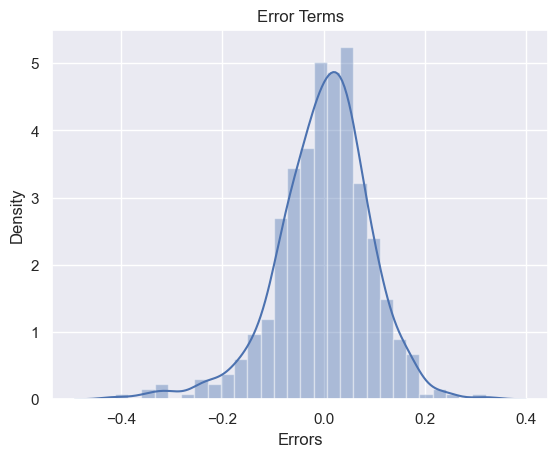

In [74]:
# Plot the histogram of the error terms
sns.distplot(y_train - y_train_pred)
plt.title('Error Terms')                  
plt.xlabel('Errors')  
plt.show()

In [ ]:
Findings - Errors are normally distributed and mean is zero.

In [ ]:
2 Checking error terms are dependent or independent

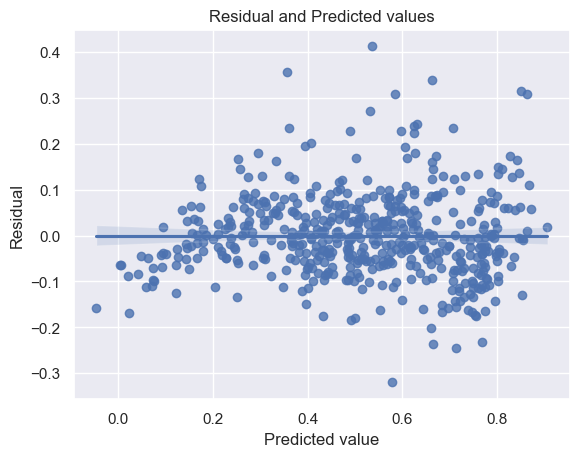

In [75]:
residual= y_train_pred - y_train 
sns.regplot(x= y_train_pred, y=residual)
plt.title("Residual and Predicted values")
plt.xlabel("Predicted value")
plt.ylabel("Residual")
plt.show()

In [ ]:
Findings :- There is no particular relationship between residual and predicted value. So, model seems to be perfect.

In [ ]:
3. Multicollinearity

In [76]:
print_vif(rfe_cols)

           Features   VIF
9              temp  3.78
2         windspeed  3.31
0                yr  2.04
5     season_summer  1.62
8   weathersit_mist  1.53
6     season_winter  1.42
3          mnth_Jan  1.21
4          mnth_Sep  1.21
7  weathersit_light  1.08
1           holiday  1.04


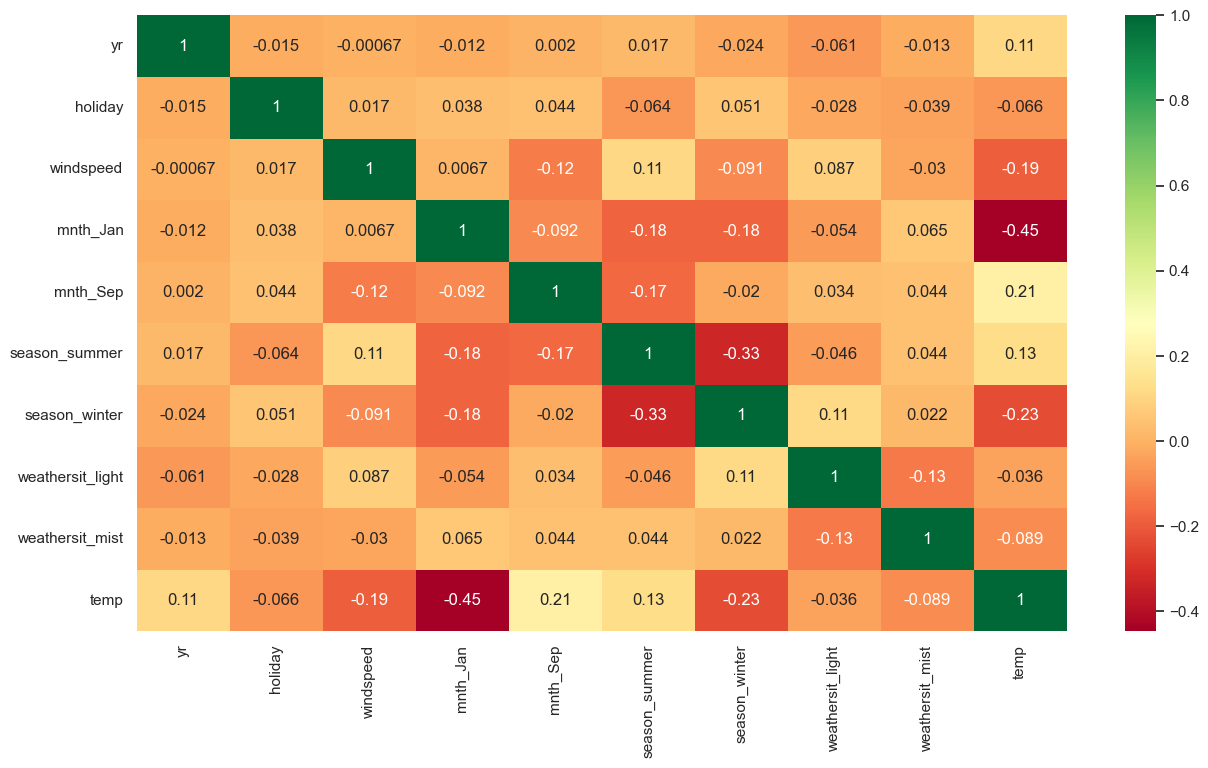

In [77]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_rfe.corr(),annot = True, cmap="RdYlGn")
plt.show()

In [ ]:
Finding - VIF values are less than 5 which is good and also there is no multicolinearity as seen from the heatmap.

In [ ]:
4. homoscedasticity of error terms

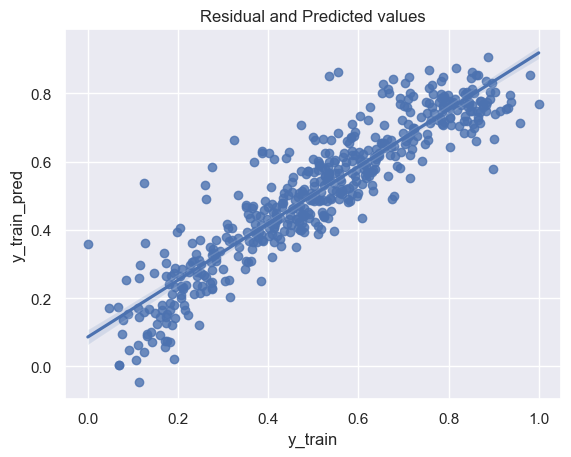

In [78]:
sns.regplot(x= y_train, y=y_train_pred)
plt.title("Residual and Predicted values")
plt.xlabel("y_train")
plt.ylabel("y_train_pred")
plt.show()

In [ ]:
Findings :- There is equal variance of predicted value. There is no particular high concentration of data points and is constant across prediction,
means there is homoscedasticity of error terms.

In [ ]:
Making Predictions Using the Final Model

In [79]:
numeric_cols =['temp','atemp','hum','windspeed','cnt']
df_test[numeric_cols] = scaler.transform(df_test[numeric_cols])

In [80]:
y_test = df_test.pop('cnt')
X_test = df_test

In [81]:
# dataframe of selected features 
print(rfe_cols)
#rfe_cols = ['yr', 'holiday', 'windspeed',  'mnth_Sep', 
#       'season_summer', 'season_winter', 'weekday_Sunday', 'weathersit_light',
#       'weathersit_mist','temp']
X_test_sm = X_test[rfe_cols]

Index(['yr', 'holiday', 'windspeed', 'mnth_Jan', 'mnth_Sep', 'season_summer',
       'season_winter', 'weathersit_light', 'weathersit_mist', 'temp'],
      dtype='object')


In [82]:
# Adding constant variable to test dataframe
X_test_sm = sm.add_constant(X_test_sm)

In [83]:
#predicting test values
y_pred = lr_model.predict(X_test_sm)

In [ ]:
Model Evaluation

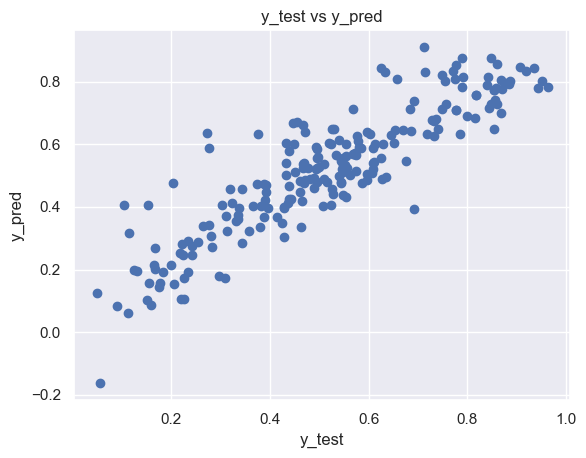

In [84]:
plt.scatter(y_test, y_pred)
plt.title('y_test vs y_pred')             
plt.xlabel('y_test')                          
plt.ylabel('y_pred')
plt.show()

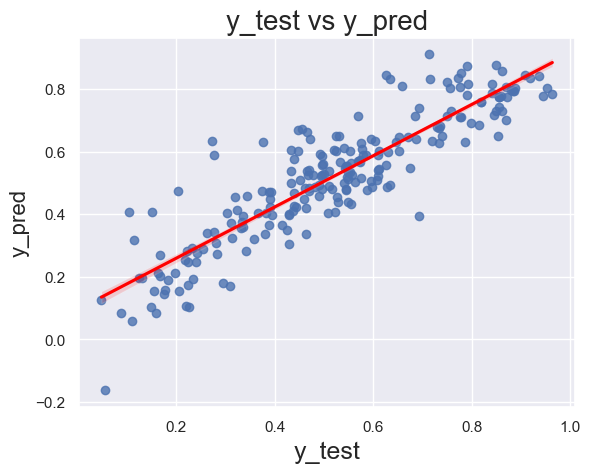

In [85]:
# Visualizing the fit on the test data
# plotting a Regression plot
plt.figure()
y_pred = y_pred.astype(float)
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

In [86]:
r2_train = r2_score(y_train, y_train_pred)
print('R^2 score on train data ', round(r2_train, 4))# - y_train 

R^2 score on train data  0.8325


In [87]:
r2_test = r2_score(y_test, y_pred)
print('R^2 score on test data ', round(r2_test, 4))

R^2 score on test data  0.7917


In [88]:
# Calculating Adjusted-R^2 value for the train dataset
adjusted_r2_train = round(1-(1-r2_train)*(X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1),4)
print('Adjusted-R^2 score on train data ', adjusted_r2_train)

Adjusted-R^2 score on train data  0.822


In [89]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2_test = round(1-(1-r2_test)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print('Adjusted-R^2 score on test data ', adjusted_r2_test)

Adjusted-R^2 score on test data  0.7585


In [ ]:
Summary :- 

In [90]:
# Equation for best fitted line is
round(lr_model.params, 4)

const               0.1518
yr                  0.2344
holiday            -0.0981
windspeed          -0.1608
mnth_Jan           -0.0451
mnth_Sep            0.0988
season_summer       0.0810
season_winter       0.1191
weathersit_light   -0.2852
weathersit_mist    -0.0779
temp                0.5189
dtype: float64

In [91]:
# VIF of significant columns 
print(lr_model.params)
print_vif(rfe_cols)

const               0.151838
yr                  0.234363
holiday            -0.098121
windspeed          -0.160791
mnth_Jan           -0.045070
mnth_Sep            0.098774
season_summer       0.080980
season_winter       0.119134
weathersit_light   -0.285236
weathersit_mist    -0.077889
temp                0.518910
dtype: float64
           Features   VIF
9              temp  3.78
2         windspeed  3.31
0                yr  2.04
5     season_summer  1.62
8   weathersit_mist  1.53
6     season_winter  1.42
3          mnth_Jan  1.21
4          mnth_Sep  1.21
7  weathersit_light  1.08
1           holiday  1.04


In [ ]:
Significant variables list based on VIF:

In [ ]:
1. temp
2. windspeed
3. yr
4. season_summer
5. weathersit_mist

In [ ]:
Comparision between Training and Testing dataset:

In [ ]:
Train dataset R^2: 0.8325
Test dataset R^2: 0.7917
Train dataset Adjusted R^2: 0.822
Test dataset Adjusted R^2: 0.7585